# Import Data Set

In [21]:
import pandas as pd
data = pd.read_csv("C:\\Users\\Admin34\\Downloads\\WC_AT.csv")
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [45]:
data.shape


(109, 2)

# Correlation

In [23]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


C:\Users\Admin34\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Waist', ylabel='Density'>

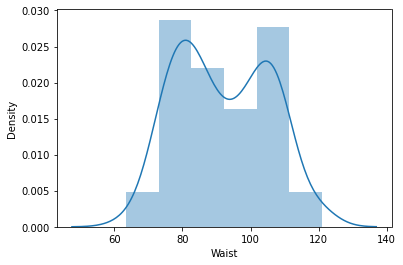

In [24]:
import seaborn as sns
sns.distplot(data['Waist'])

C:\Users\Admin34\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AT', ylabel='Density'>

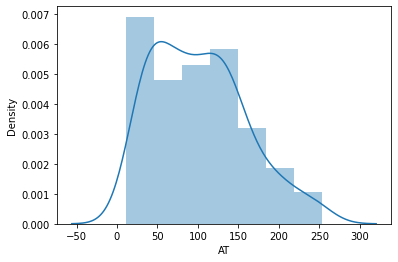

In [25]:
import seaborn as sns
sns.distplot(data['AT'])

Fitting a Linear Regression Model

In [26]:
import statsmodels.formula.api as smf
model = smf.ols("AT~Waist",data = data).fit()

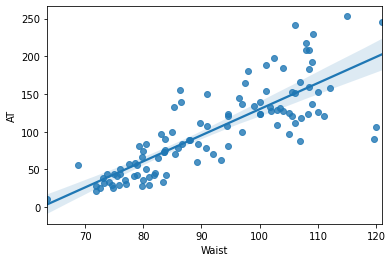

In [27]:
sns.regplot(x="Waist", y="AT", data=data);

In [28]:
#Coefficients
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [29]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [30]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6700368930528429, 0.6669531256981966)

# Predict for new data point

In [46]:
#Predict for 74 and 80 (Waist) 
newdata=pd.Series([74,80,100])
from ml_metrics import rmse

In [47]:
data_pred=pd.DataFrame(newdata,columns=['Waist'])

In [48]:
model.predict(data_pred)

0     39.974107
1     60.727263
2    129.904451
dtype: float64

In [49]:
Pred=model.predict(data.Waist)
from ml_metrics import rmse
rmse(Pred,data.AT)
                

32.760177495755144